This file simulates an Open Jackson Network model in a health care system. 

There are 3 nodes in the queueing system, and patients could arrive from outside and inside of the system.

In order to meet with the assumptions of Open Jackson Network, let us assume that all external arrivals of patients are subject to a Poisson Process, and the service times of patients at each node are exponentially distributed.


In [1]:
"""
Open Jackson Network Simulation with Ciw library
                                                                                --Xuejun, Xu
"""

'\nOpen Jackson Network Simulation with Ciw library\n                                                                                --Xuejun, Xu\n'

In [2]:
#import all needed modules
import ciw

import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

According to the parameters in the case study, at first we need to create a network object containing all needed parameters for the Open Jackson Network simulation.

In [21]:
N = ciw.create_network(
    Arrival_distributions=[['Exponential', 80],
                           ['Exponential', 60],
                           ['Exponential', 40]],
    Service_distributions=[['Exponential', 20],
                           ['Exponential', 8],
                           ['Exponential', 8]],
    Transition_matrices=[[0.0, 0.7, 0.2],
                         [0.3, 0.0, 0.4],
                         [0.2, 0.4, 0.0]],
    Number_of_servers=[50, 40, 20],
    Queue_capacities=['Inf','Inf','Inf']                        
)

In [22]:
print(N)

Next, let's run a simulation for 1000 times, and let the first 50 units to be the warm-up period of the network.

In [23]:
Q = ciw.Simulation(N)
Q.simulate_until_max_time(1000)

In [24]:
recs = Q.get_all_records()

In [26]:
#the warm up time is 50, and calculate the waiting time after the warm up units
#waits = [r.waiting_time for r in recs if r.arrival_date > 50]
waits_at_node_1=[r.waiting_time for r in recs if r.arrival_date > 50 and r.node==1]
waits_at_node_2=[r.waiting_time for r in recs if r.arrival_date > 50 and r.node==2]
waits_at_node_3=[r.waiting_time for r in recs if r.arrival_date > 50 and r.node==3]


In [27]:
mean_wait_1= sum(waits_at_node_1)/len(waits_at_node_1)
mean_wait_2= sum(waits_at_node_2)/len(waits_at_node_2)
mean_wait_3= sum(waits_at_node_3)/len(waits_at_node_3)
print('expected waiting time at node 1 is '+str(mean_wait_1))
print('expected waiting time at node 2 is '+str(mean_wait_2))
print('expected waiting time at node 3 is '+str(mean_wait_3))

expected waiting time at node 1 is 0.0
expected waiting time at node 2 is 0.002077146148095926
expected waiting time at node 3 is 59.10188355144648


Finally, we could plot the expected waiting times in the simulation at each node.

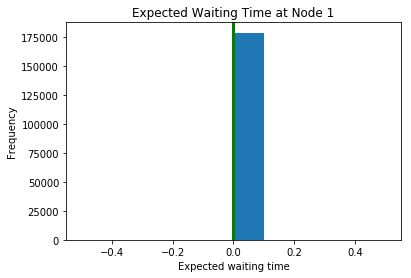

In [33]:
plt.hist(waits_at_node_1)
plt.axvline(x=mean_wait_1, linewidth=3, c='g')
plt.title('Expected Waiting Time at Node 1')
plt.xlabel('Expected waiting time')
plt.ylabel('Frequency')
plt.show()

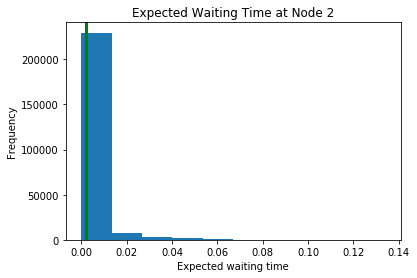

In [34]:
plt.hist(waits_at_node_2)
plt.axvline(x=mean_wait_2, linewidth=3, c='g')
plt.title('Expected Waiting Time at Node 2')
plt.xlabel('Expected waiting time')
plt.ylabel('Frequency')
plt.show()

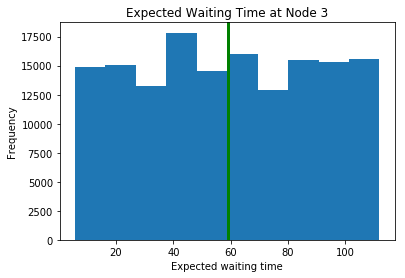

In [35]:
plt.hist(waits_at_node_3)
plt.axvline(x=mean_wait_3, linewidth=3, c='g')
plt.title('Expected Waiting Time at Node 3')
plt.xlabel('Expected waiting time')
plt.ylabel('Frequency')
plt.show()